<h2 style="font-family:Comic Sans MS; color:purple">1. Second Hand Car Price Prediction</h2>

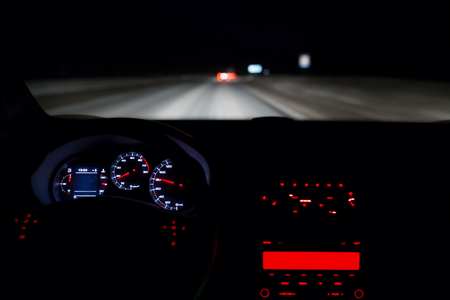

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Attribute</b></th>
            <th><b>Details</b></th>
        </tr>
        <tr>
            <td><b>Author</b></td>
            <td><b>Muhammad Tayyab Ali</b></td>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/TayyabAli92"><img src="https://img.shields.io/badge/GitHub-Profile-red?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/tayyab-ali-personal-86a3582b8/"><img src="https://img.shields.io/badge/LinkedIn-Profile-red?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
            <td>Twitter</td>
            <td><a href="https://twitter.com/Tayyab_Ali92"><img src="https://img.shields.io/badge/Twitter-Profile-red?style=for-the-badge&logo=twitter" alt="Twitter"/></a></td>
        </tr>
        <tr>
            <td>Facebook</td>
            <td><a href="https://www.facebook.com/profile.php?id=61556758989955"><img src="https://img.shields.io/badge/Facebook-Profile-red?style=for-the-badge&logo=facebook" alt="Facebook"/></a></td>
        </tr>
        <tr>
            <td>Gmail</td>
            <td><a href="tayyabali.personal@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-green?style=for-the-badge&logo=gmail" alt="Gmail"/></a></td>
        </tr>
    </table>
</div>

<h2 style="font-family:Comic Sans MS; color:purple">2. Import Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

<h2 style="font-family:Comic Sans MS; color:purple">3. Load the Dataset</h2>

In [2]:
df = pd.read_csv('./data/cars.csv')

In [3]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
from sklearn.preprocessing import LabelEncoder
Lbl = LabelEncoder()
df.Brand=Lbl.fit_transform(df.Brand)
df.Model=Lbl.fit_transform(df.Model)
df["Fuel_Type"]=Lbl.fit_transform(df["Fuel_Type"])
df.Transmission =Lbl.fit_transform(df.Transmission)
df["Owner_Type"]=Lbl.fit_transform(df["Owner_Type"])
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,1,1,0,15,1498,108,5,800000
1,2,3,14,2019,40000,1,0,1,17,1597,140,5,1000000
2,3,2,30,2017,20000,1,0,0,10,4951,395,4,2500000
3,4,6,42,2020,30000,0,1,2,23,1248,74,5,600000
4,5,4,41,2016,60000,0,0,1,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,11,2019,22000,0,0,0,16,1950,191,5,2900000
96,97,9,29,2017,38000,0,1,1,13,2755,171,7,1400000
97,98,2,18,2018,26000,1,1,2,18,1497,121,5,750000
98,99,4,50,2019,24000,1,0,1,17,1497,113,5,850000


<h2 style="font-family:Comic Sans MS; color:purple"> 4. Data Analysis</h2>

In [5]:
df.info

<bound method DataFrame.info of     Car_ID  Brand  Model  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0        1      9     15  2018              50000          1             1   
1        2      3     14  2019              40000          1             0   
2        3      2     30  2017              20000          1             0   
3        4      6     42  2020              30000          0             1   
4        5      4     41  2016              60000          0             0   
..     ...    ...    ...   ...                ...        ...           ...   
95      96      7     11  2019              22000          0             0   
96      97      9     29  2017              38000          0             1   
97      98      2     18  2018              26000          1             1   
98      99      4     50  2019              24000          1             0   
99     100      8      7  2020              18000          1             1   

    Owner_Type  Mileage  Engine

<h2 style="font-family:Comic Sans MS; color:purple">5. Ploting</h2>

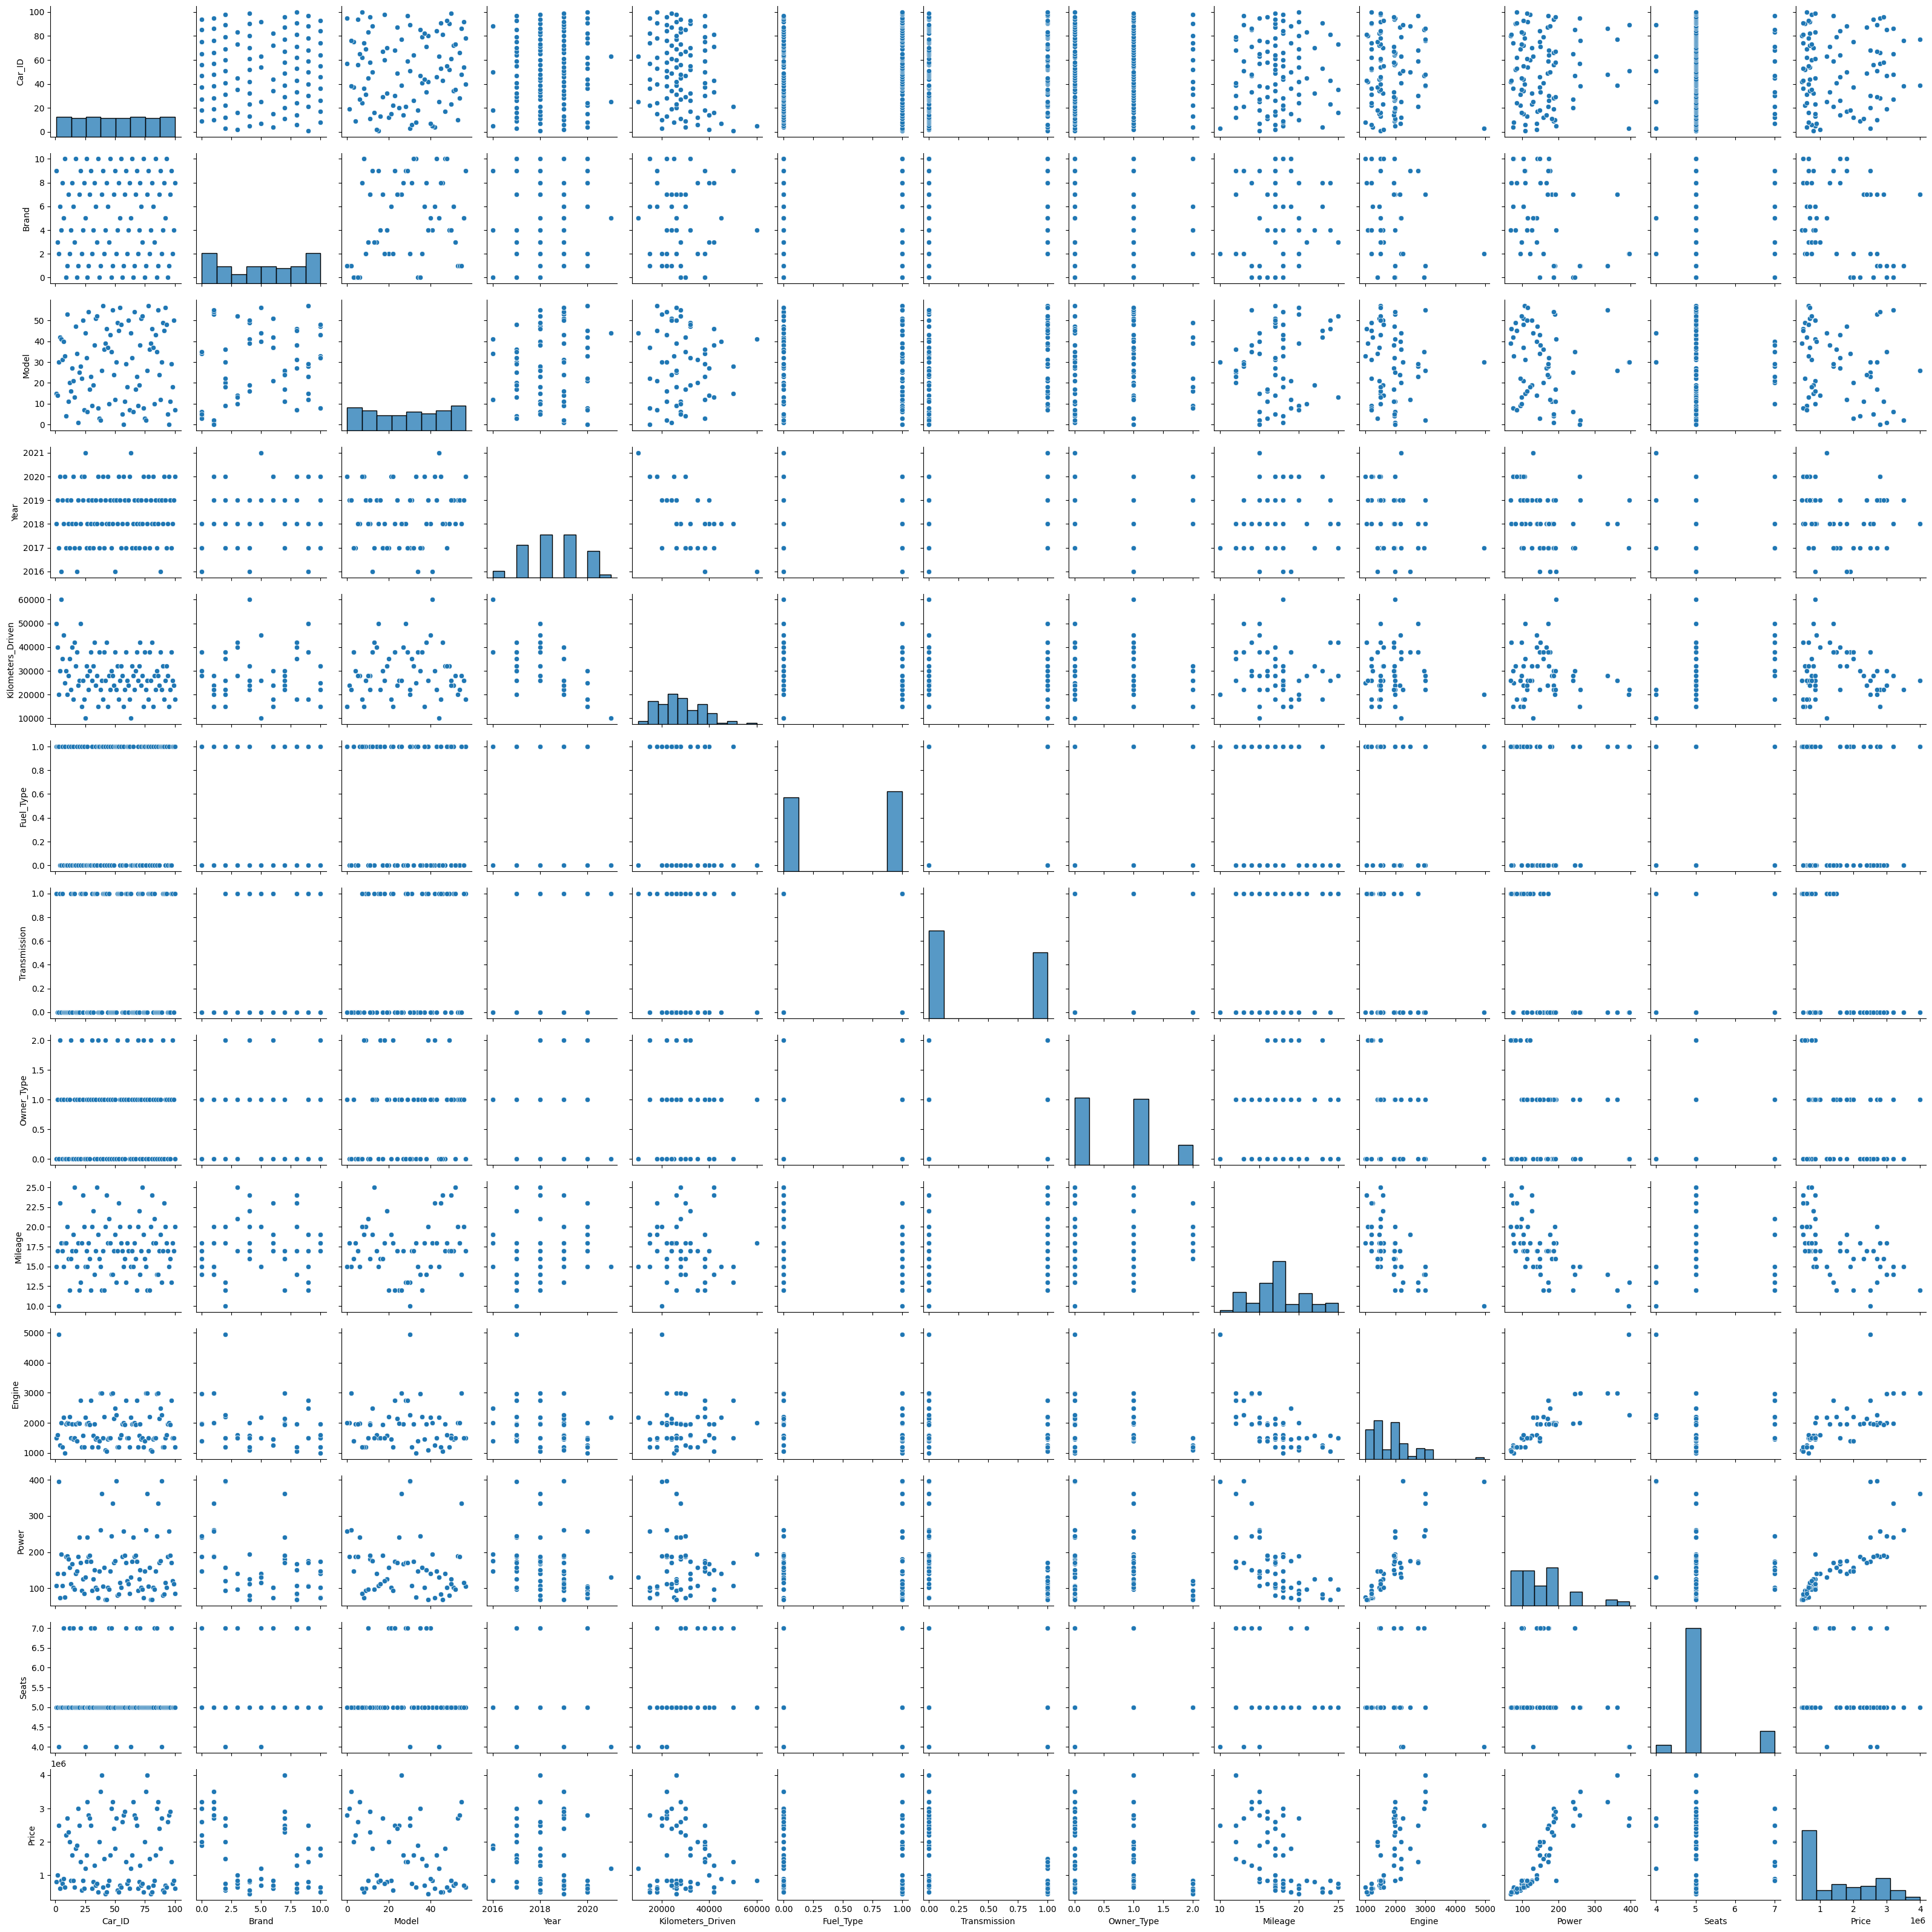

In [6]:
sns.pairplot(df)
plt.show()

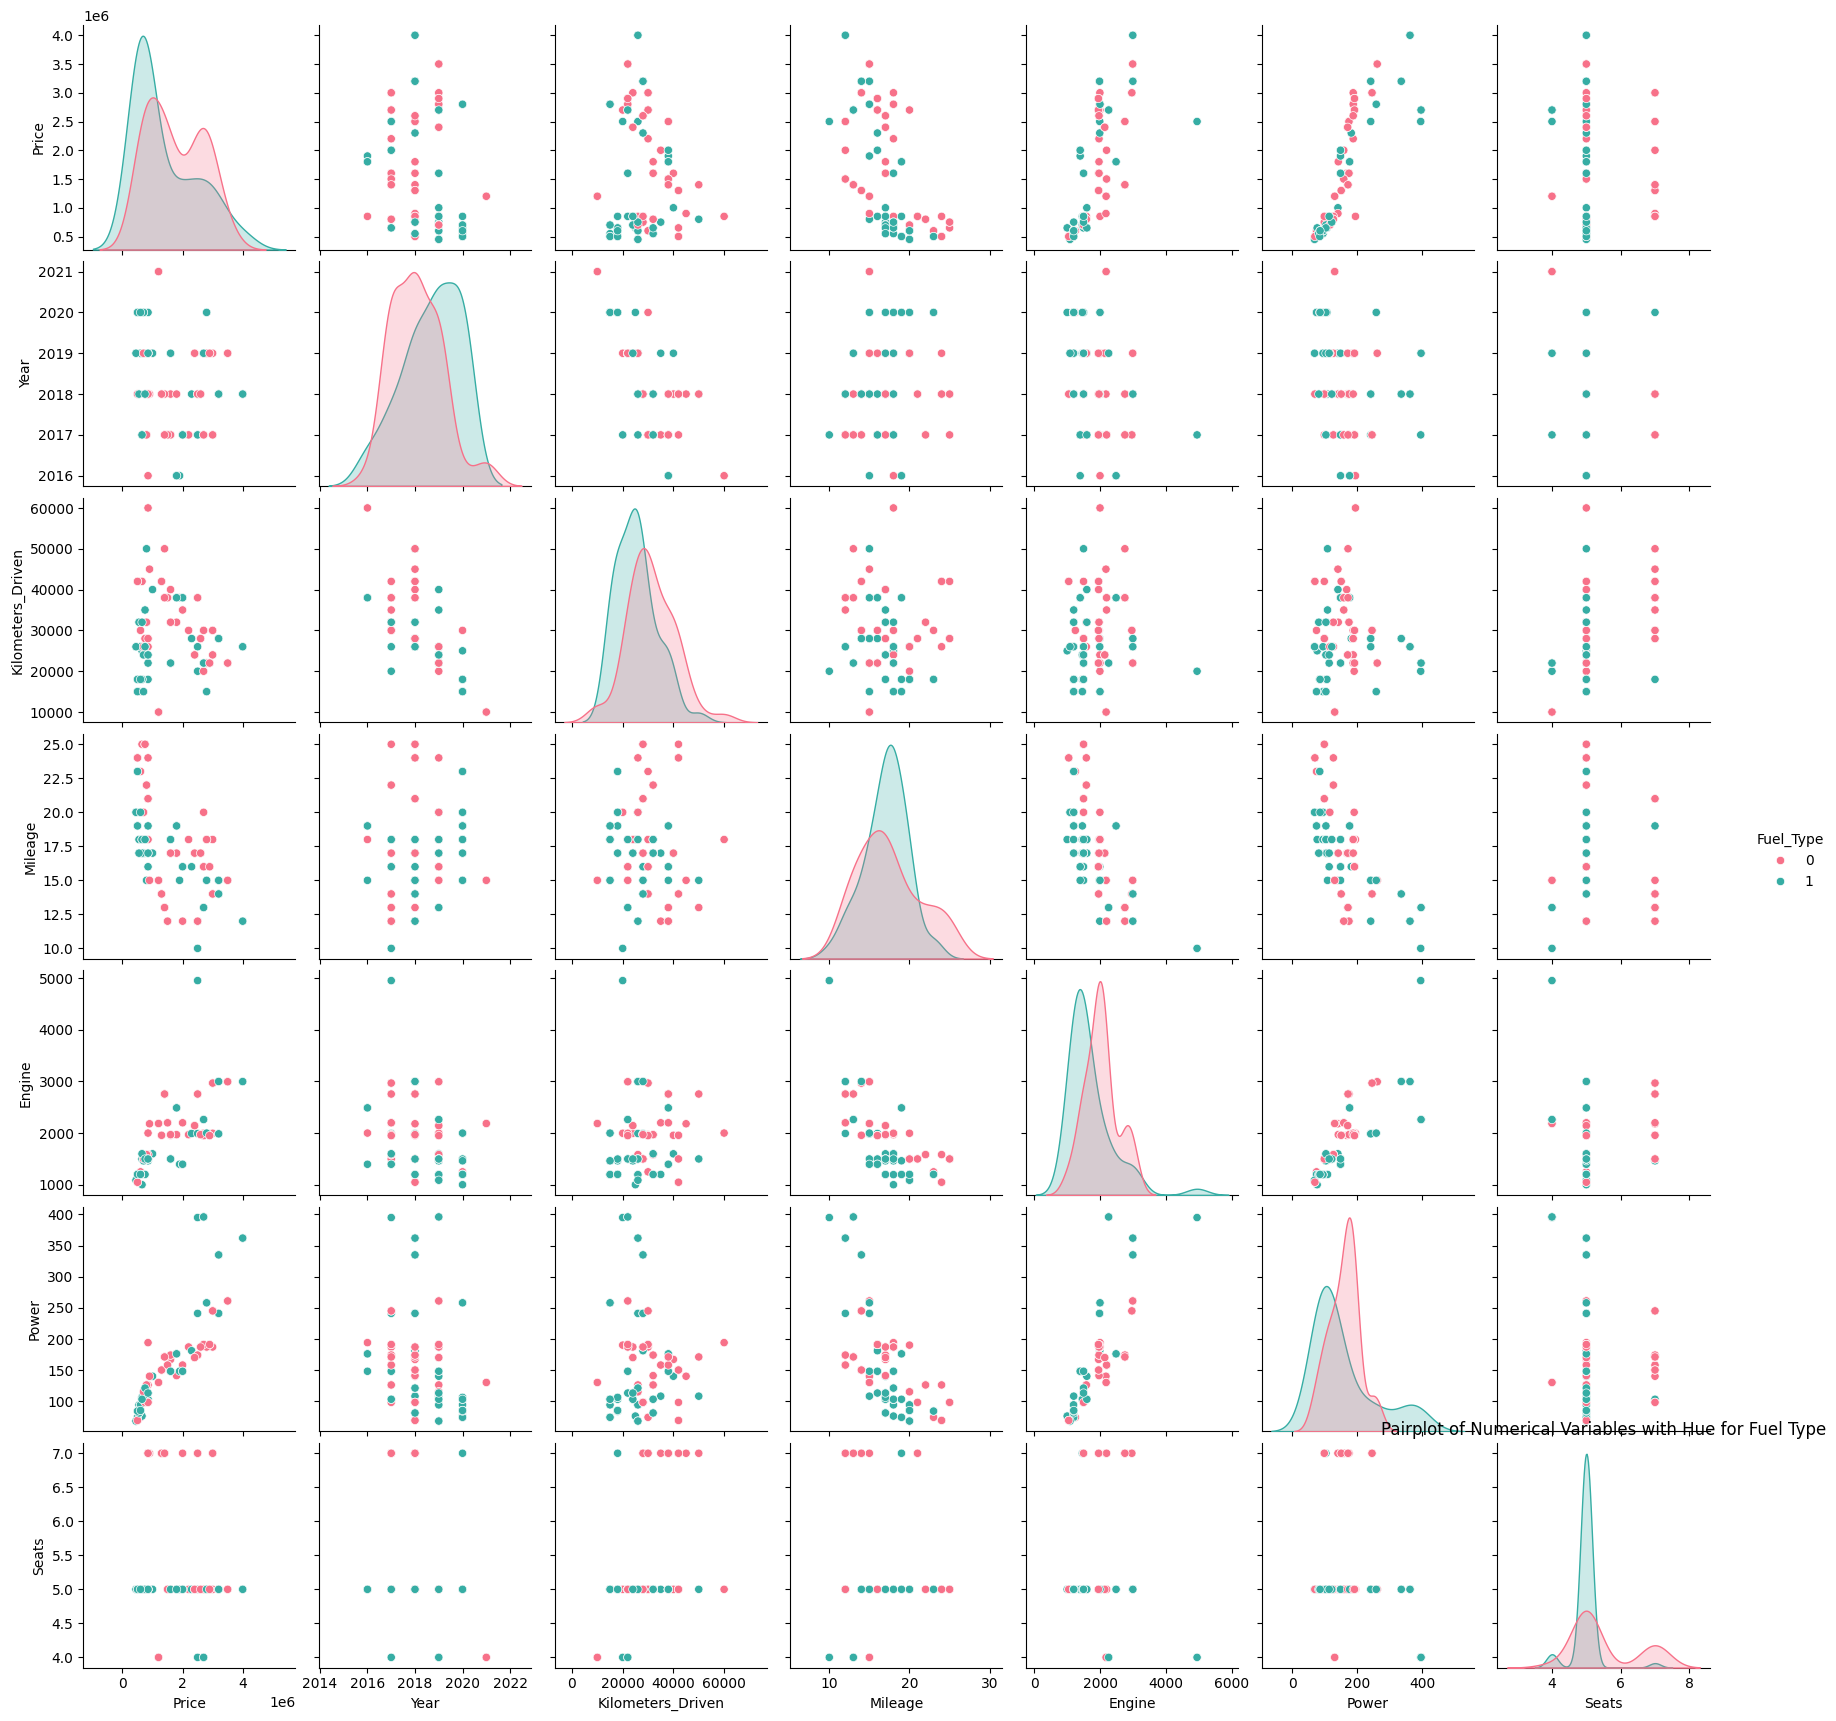

In [7]:
sns.pairplot(df[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type']], hue='Fuel_Type', palette='husl')
plt.title('Pairplot of Numerical Variables with Hue for Fuel Type')
plt.show()

<Axes: >

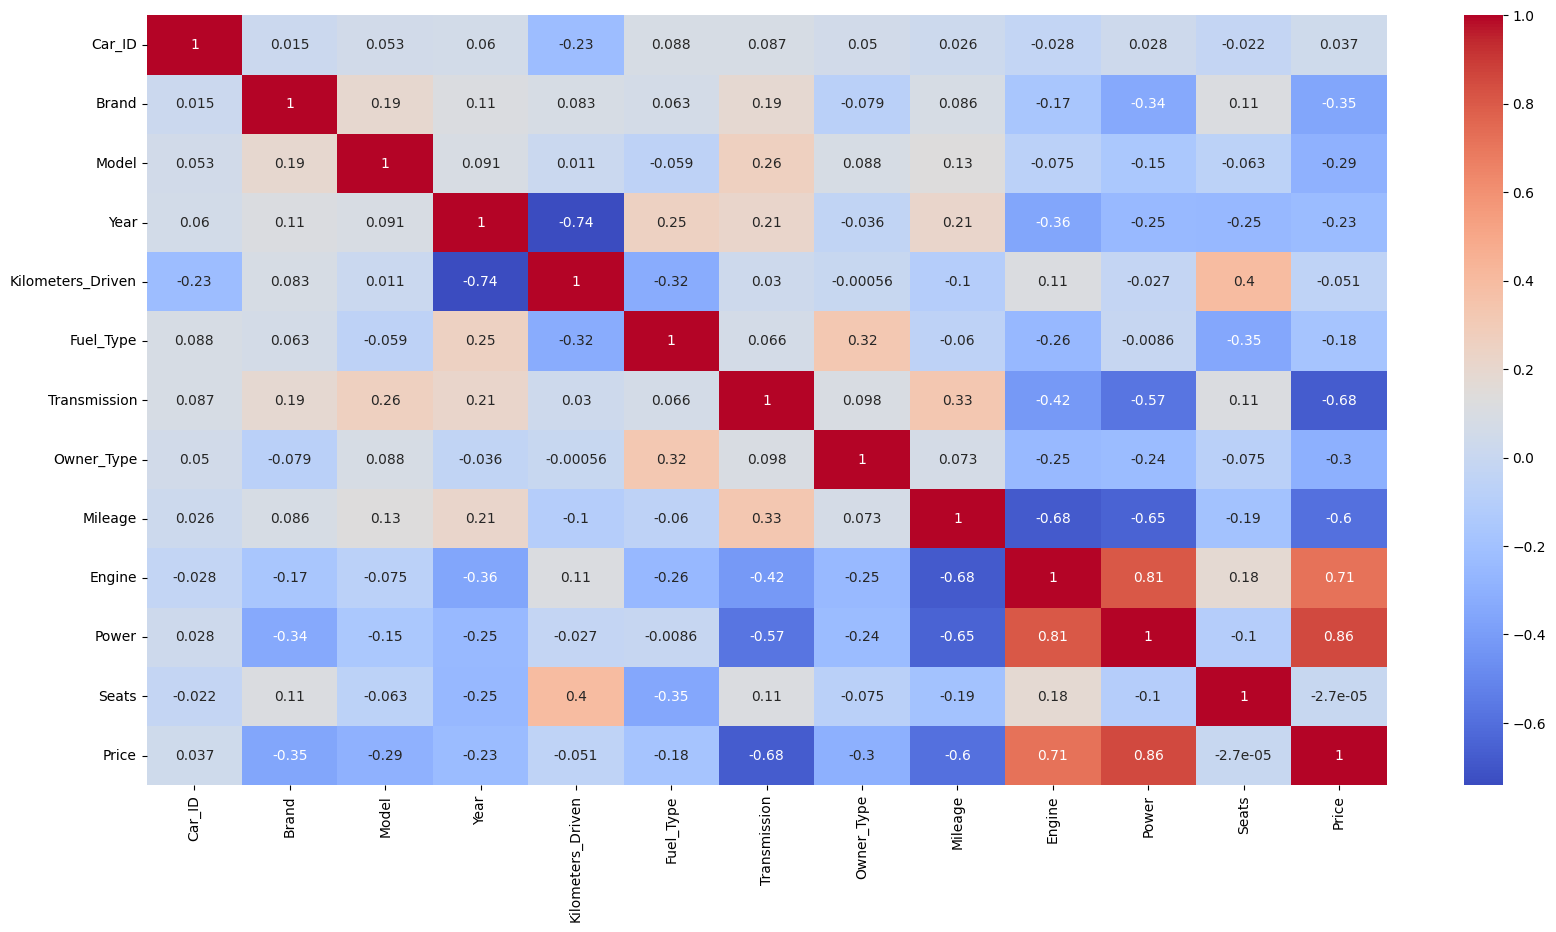

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

array([[<Axes: title={'center': 'Car_ID'}>,
        <Axes: title={'center': 'Brand'}>,
        <Axes: title={'center': 'Model'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner_Type'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Seats'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

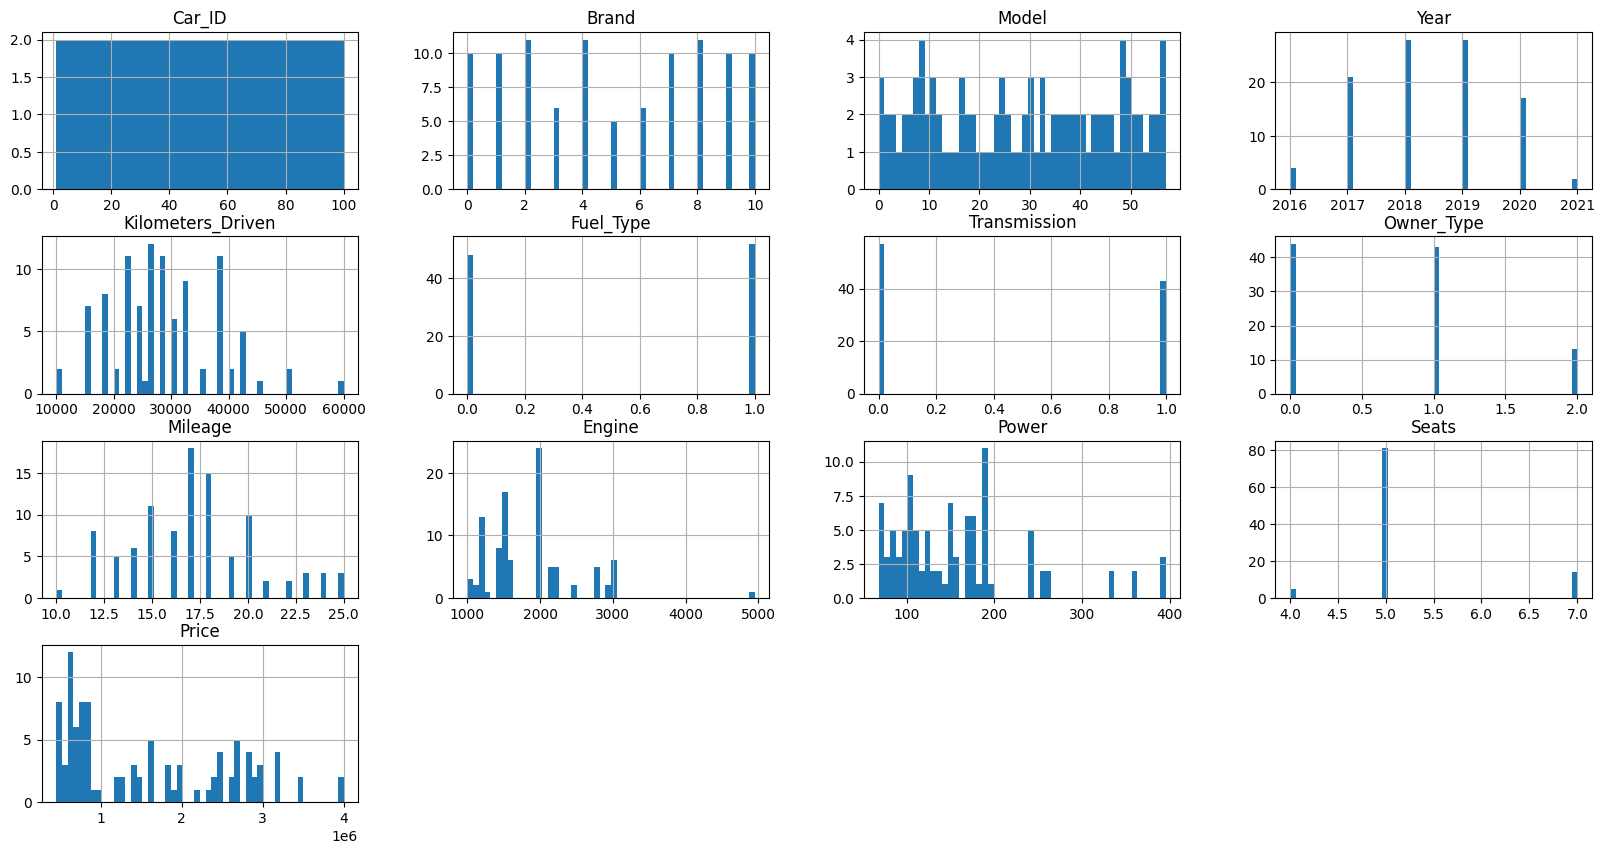

In [9]:
df.hist(figsize=(20,10),bins = 50)

In [10]:
X = df.drop(["Price"],axis=1)
X

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,1,9,15,2018,50000,1,1,0,15,1498,108,5
1,2,3,14,2019,40000,1,0,1,17,1597,140,5
2,3,2,30,2017,20000,1,0,0,10,4951,395,4
3,4,6,42,2020,30000,0,1,2,23,1248,74,5
4,5,4,41,2016,60000,0,0,1,18,1999,194,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,11,2019,22000,0,0,0,16,1950,191,5
96,97,9,29,2017,38000,0,1,1,13,2755,171,7
97,98,2,18,2018,26000,1,1,2,18,1497,121,5
98,99,4,50,2019,24000,1,0,1,17,1497,113,5


In [11]:
y = df["Price"]
y = pd.DataFrame(y)
y

,Price
0,800000
1,1000000
2,2500000
3,600000
4,850000
...,...
95,2900000
96,1400000
97,750000
98,850000


In [12]:
# Standard Scaler for Data
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)
X

array([[-1.71481604,  1.19759354, -0.79589113, ..., -0.56870447,
        -0.65458965, -0.30814935],
       [-1.68017329, -0.61237151, -0.85369005, ..., -0.41109805,
        -0.23673869, -0.30814935],
       [-1.64553055, -0.91403235,  0.07109267, ...,  4.92841654,
         3.09301119, -1.64792914],
       ...,
       [ 1.64553055, -0.91403235, -0.62249437, ..., -0.57029646,
        -0.4848377 , -0.30814935],
       [ 1.68017329, -0.31071067,  1.22707108, ..., -0.57029646,
        -0.58930044, -0.30814935],
       [ 1.71481604,  0.8959327 , -1.2582825 , ..., -1.04470771,
        -0.95492003, -0.30814935]])

In [13]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
y = scaler.fit_transform(y)
y

array([[-0.77769348],
       [-0.57673909],
       [ 0.93041882],
       [-0.97864787],
       [-0.72745489],
       [-0.82793208],
       [-0.67721629],
       [-0.92840927],
       [ 0.62898724],
       [ 1.13137321],
       [ 0.72946443],
       [ 0.42803285],
       [-0.72745489],
       [ 0.02612407],
       [-0.72745489],
       [-0.92840927],
       [ 0.22707846],
       [ 0.32755565],
       [ 1.43280479],
       [ 0.93041882],
       [-0.17483032],
       [-1.02888647],
       [-0.72745489],
       [-0.97864787],
       [-0.37578471],
       [ 0.02612407],
       [ 1.63375918],
       [ 1.2318504 ],
       [ 1.13137321],
       [ 0.93041882],
       [-0.97864787],
       [-0.77769348],
       [-0.27530751],
       [-0.87817068],
       [-0.82793208],
       [-1.07912506],
       [ 0.42803285],
       [ 1.93519076],
       [ 2.43757673],
       [-0.92840927],
       [-0.07435312],
       [-1.12936366],
       [-1.07912506],
       [-0.87817068],
       [-0.72745489],
       [ 0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle =True)

In [15]:
from sklearn.ensemble import RandomForestRegressor
reg_moduel = RandomForestRegressor(n_estimators=150,random_state=33)
reg_moduel.fit(X_train,y_train)

# Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test)) 

c:\Users\Welcome\.conda\envs\python_ml\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor Train Score is :  0.9898603403052744
Random Forest Regressor Test Score is :  0.9153509285442023
